In [1]:
import pandas as pd
import numpy as np


np.random.seed(42)

n_samples = 1000


item_price = np.round(np.random.uniform(5, 100, size=n_samples), 2)
item_category = np.random.choice(['Clothing', 'Books', 'Furniture'], size=n_samples)
customer_age = np.random.randint(18, 75, size=n_samples)
discount = np.random.choice([0, 1], size=n_samples)
store_location = np.random.choice([0, 1, 2], size=n_samples)


purchased = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])


df = pd.DataFrame({
    'Item Price': item_price,
    'Item Category': item_category,
    'Customer Age': customer_age,
    'Discount': discount,
    'Store Location': store_location,
    'Purchased': purchased
})


file_name = "thrift_store_data.csv"
df.to_csv(file_name, index=False)

print(f"Dataset saved as {file_name}")

Dataset saved as thrift_store_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


df = pd.read_csv("thrift_store_data.csv")


X = df.drop("Purchased", axis=1)
y = df["Purchased"]

X = pd.get_dummies(X, columns=["Item Category", "Store Location"], drop_first=True)


scaler = StandardScaler()
X[['Item Price', 'Customer Age', 'Discount']] = scaler.fit_transform(
    X[['Item Price', 'Customer Age', 'Discount']]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


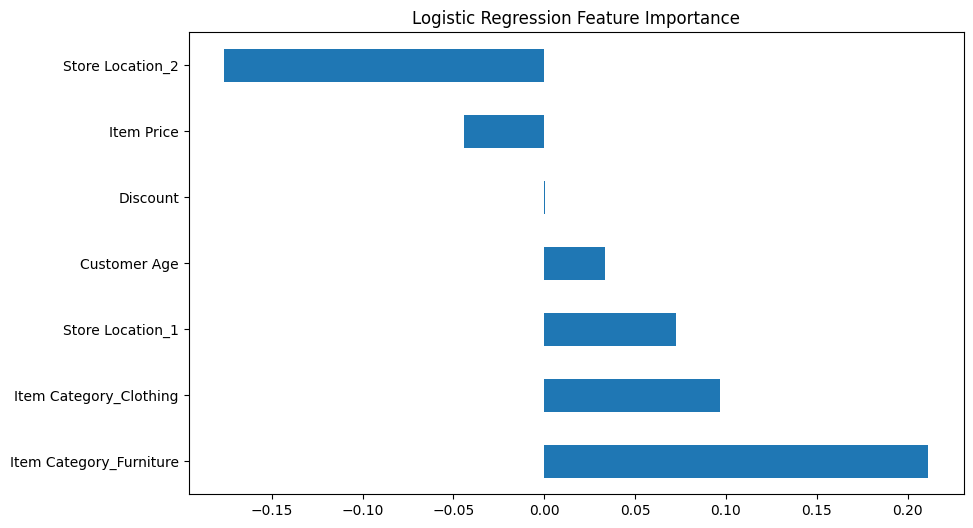

Logistic Regression
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       128
           1       0.00      0.00      0.00        72

    accuracy                           0.64       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.41      0.64      0.50       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


y_pred_log = log_model.predict(X_test)


importance = pd.Series(log_model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), title="Logistic Regression Feature Importance")
plt.show()


print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


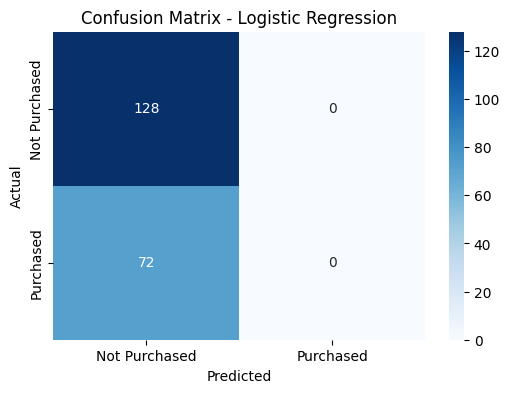

In [4]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


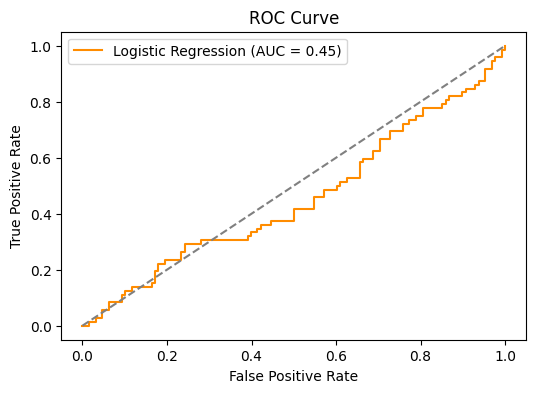

In [5]:
y_proba_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.555
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       128
           1       0.35      0.26      0.30        72

    accuracy                           0.56       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.53      0.56      0.54       200



In [7]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       128
           1       0.00      0.00      0.00        72

    accuracy                           0.64       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.41      0.64      0.50       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
